# notebook to explore the dataset
dataset: https://www.kaggle.com/datasets/bhupendram/carprices?resource=download 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data

### Inladen

In [256]:
# load data
filepath = "./DATA/car_prices.csv"
raw_data = pd.read_csv(filepath) 
raw_data.describe()


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### Exploratie

In [257]:
raw_data["trim"].unique().size

1964

we hebben volgende kolommen in de dataset: 
- year: Jaartal waarin de auto werd geproduceerd
- make: Merk van de auto
- model: Model van de auto
- trim: De uitvoering van het specifieke model (vele modellen) TODO: opkuisen, samenzetten? 
- body: Het type auto (vele types) TODO: opkuisen, samenzetten? 
- transmission: De transmissie van de auto (manueel / automatisch)
- vin: Chassisnummer van de auto
- state: Amerikaanse staat waar de auto verkocht wordt
- condition: De staat van de auto, tussen 1 en 49 (waarschijnlijk 1 slechtste staat tot 49 beste staat gezien de prijs recht-evenredig is met dit getal)
- odometer: Kilometerstand van de auto
- color: De kleur van de auto
- interior: De kleur van het interieur
- seller: De plaats/organisatie die de auto verkoopt
- mmr: Ik vond niet meteen een beschrijving van deze kolom maar na een Google search kwam ik hetvolgende tegen: "Manheim Market Report, otherwise known as MMR. MMR values are designed to allow car dealerships to assess how much should be offered for any potential trade-ins."
- sellingprice: De verkoopsprijs
- saledate: De datum van verkoop

Onderstaande plot geeft een inzicht in hoe de groepen van ... verdeeld zijn. We kunnen concluderen dat ... TODO

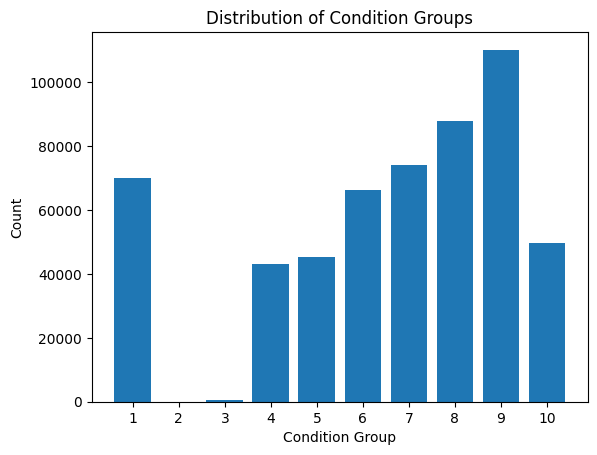

In [258]:
# Define a function to group the condition column into 10 groups
def group_condition(value):
    return (value - 1) // 5 + 1

# Apply the grouping function to the condition column
raw_data['condition_group'] = raw_data['condition'].apply(group_condition)

# Calculate the distribution of each group
condition_distribution = raw_data['condition_group'].value_counts().sort_index()

# Plot the distribution
plt.bar(condition_distribution.index, condition_distribution.values)
plt.xlabel('Condition Group')
plt.ylabel('Count')
plt.title('Distribution of Condition Groups')
plt.xticks(range(1, 11))  # Ensure x-axis shows groups 1 to 10
plt.show()

na toepassen hergroeperen:
9.0     110165
8.0      87725
7.0      73951
1.0      70101
6.0      66369
10.0     49808
5.0      45331
4.0      43025
0.0      11820
3.0        542
Name: condition_group, dtype: int64


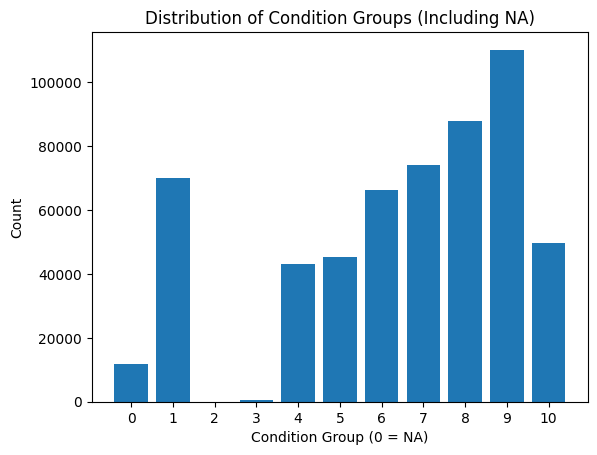

In [259]:
# Define a function to group the condition column into 10 groups, with NA values as group 0
def group_condition(value):
    if pd.isna(value):  # Check if the value is NA
        return 0
    return (value - 1) // 5 + 1

# Apply the grouping function to the condition column

raw_data['condition_group'] = raw_data['condition'].apply(group_condition)
print(f"na toepassen hergroeperen:\n{raw_data['condition_group'].value_counts()}")

# Calculate the distribution of each group
condition_distribution = raw_data['condition_group'].value_counts().sort_index()

# Plot the distribution
plt.bar(condition_distribution.index, condition_distribution.values)
plt.xlabel('Condition Group (0 = NA)')
plt.ylabel('Count')
plt.title('Distribution of Condition Groups (Including NA)')
plt.xticks(range(0, 11))  # Ensure x-axis shows groups 0 to 10
plt.show()

De kolom "condition" bevat getallen tussen 1 en 49, die hierboven zijn onderverdeeld in 10 categorieën. Het is uit de documentatie over de dataset niet helemaal duidelijk wat dit voor stelt, of 49 de beste score is of de slechtste. Daarom onderstaande plot die inzicht probeert te geven hoe de verkoopsprijs wordt bepaald door de waarde voor condition:

C:\Users\jarno\AppData\Local\Temp\ipykernel_13320\1996854479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['condition'] = df_clean['condition'].astype(int)


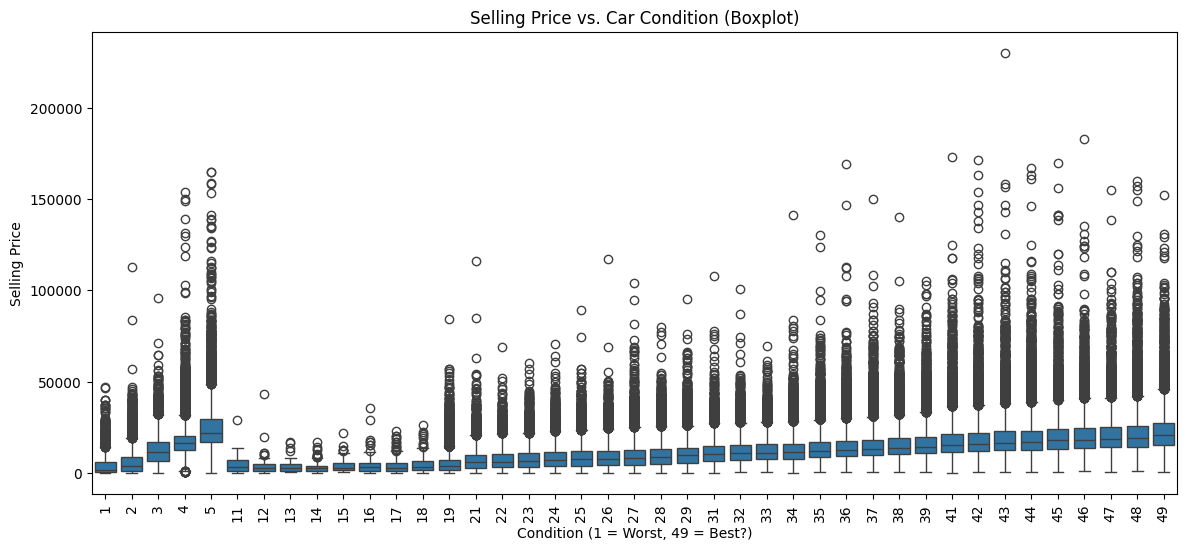

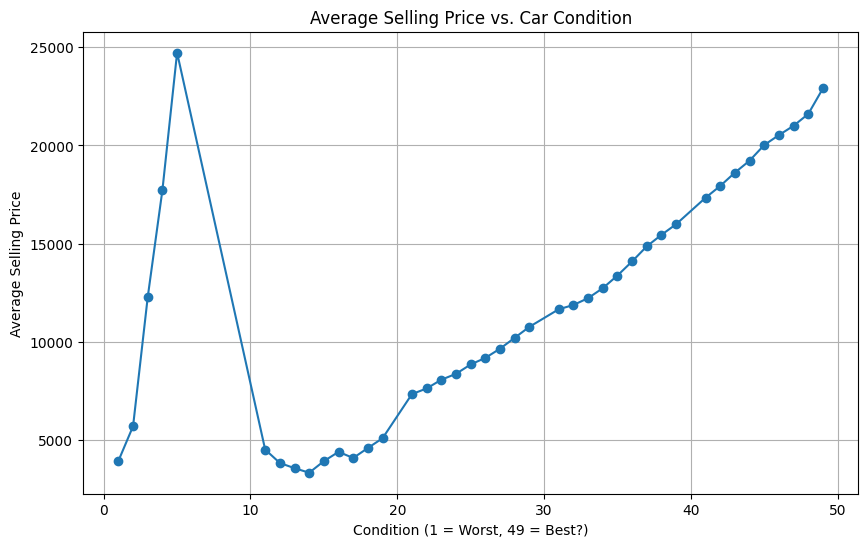

In [260]:
# Drop rows with missing condition or price
df_clean = raw_data.dropna(subset=['condition', 'sellingprice'])

# Convert condition to integer (if necessary)
df_clean['condition'] = df_clean['condition'].astype(int)

# plot 1: Boxplot (to see price distributions per condition)
plt.figure(figsize=(14, 6))
sns.boxplot(x='condition', y='sellingprice', data=df_clean)
plt.title('Selling Price vs. Car Condition (Boxplot)')
plt.xticks(rotation=90)
plt.xlabel('Condition (1 = Worst, 49 = Best?)')
plt.ylabel('Selling Price')
plt.show()

# plot 2: Average price per condition
avg_price_by_condition = df_clean.groupby('condition')['sellingprice'].mean().reset_index()

# Line plot of average price per condition
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_condition['condition'], avg_price_by_condition['sellingprice'], marker='o')
plt.title('Average Selling Price vs. Car Condition')
plt.xlabel('Condition (1 = Worst, 49 = Best?)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()



In [216]:
corr = df_clean[['condition', 'sellingprice']].corr().iloc[0,1]
print(f"Correlation between condition and sellingprice: {corr:.2f}")


Correlation between condition and sellingprice: 0.32


De 2 kolommen zijn eerder laag gecorreleerd maar dat kan te wijten zijn aan het feit dat voor een zeldzame auto die al wat slijtage heeft toch nog meer geld betaald wordt en een vrijwel schadevrije goedkope auto toch niet heel duur is. We zien wel een trendlijn die omhoog gaat, wat wijst op hoe hoger de waarde in de 'condition' kolom, hoe beter de staat van het voertuig. Dit zie je goed terug in het verloop van de boxplots uit de eerste plot.

### Cleaning

#### filteren

In [217]:
raw_data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'condition_group'],
      dtype='object')

volgende kolommen worden uitgefilterd wegens weinig of niet relevant:
- vin
- state
- color: lijkt minder interessant, er zijn 46 verschillende kleuren, waarvan ook nummers (waarschijnlijk staat dit voor de RAL kleurcode)
- interior: gezien er enkel kleuren voor zijn ingevuld, niet het materiaal zoals leder/stof wat meer een rol speelt bij de verkoopprijs.
- seller
- saledate


In [218]:
# niet-relevante kolommen uitfilteren
#filtered_data = raw_data[["year", "make", "model", "trim", "body", "transmission", "condition", "odometer", "mmr", "sellingprice"]]

### DEBUGGING
filtered_data = raw_data[["year", "make", "condition", "odometer", "mmr", "sellingprice"]]

#### nullwaardes verwijderen

In [220]:
aantal_voor_nullwaardes_verwijderen = filtered_data.shape[0]
print(f"Aantal rijen voor het verwijderen van nullwaardes: {aantal_voor_nullwaardes_verwijderen}")
# nulwaardes checken
filtered_data.isnull().sum()

# nulwaarde verwijderen in de kolom "sellingprice"
filtered_data = filtered_data[filtered_data["sellingprice"].notnull()]

# nulwaarde verwijderen in de kolom "odometer"
filtered_data = filtered_data[filtered_data["odometer"].notnull()]

# nulwaarde verwijderen in de kolom "condition"
filtered_data = filtered_data[filtered_data["condition"].notnull()]

# nan values in de kolom "make" -> unknown
filtered_data['make'] = filtered_data['make'].replace(np.nan, 'unknown')

# nan values in de kolom "model" -> unknown
### filtered_data['model'] = filtered_data['model'].replace(np.nan, 'unknown')

# nan values in de kolom "body" -> unknown
### filtered_data['body'] = filtered_data['body'].replace(np.nan, 'unknown')

# nan values in de kolom "transmission" -> unknown
### filtered_data['transmission'] = filtered_data['transmission'].replace(np.nan, 'unknown')

# nan values in de kolom "trim" -> standard ????? Ik weet niet of dit klopt, ik neem aan dat wanneer er geen waarde voor trim is, het gaat over het standaard model/package
### filtered_data['trim'] = filtered_data['trim'].replace(np.nan, 'standard')

aantal_na_nullwaardes_verwijderen = filtered_data.shape[0]
print(f"Aantal rijen na het verwijderen van nullwaardes: {aantal_na_nullwaardes_verwijderen}")
print(f"Aantal rijen verwijderd: {aantal_voor_nullwaardes_verwijderen - aantal_na_nullwaardes_verwijderen}")


Aantal rijen voor het verwijderen van nullwaardes: 546976
Aantal rijen na het verwijderen van nullwaardes: 546976
Aantal rijen verwijderd: 0


#### duplicaten verwijderen

In [221]:
# check for duplicates
filtered_data.duplicated().sum()
# remove duplicates
filtered_data = filtered_data.drop_duplicates()
print(f"Aantal rijen na het verwijderen van duplicates: {filtered_data.shape[0]}")

Aantal rijen na het verwijderen van duplicates: 546975


Er zijn geen duplicaten in de gefilterde dataset.

#### check onregelmatigheden

##### make kolom

In [222]:
# make kolom 
filtered_data['make'] = filtered_data['make'].str.lower().str.strip()

In [223]:
unique_makes = filtered_data['make'].unique().tolist()

print(np.sort(unique_makes)) 

['acura' 'airstream' 'aston martin' 'audi' 'bentley' 'bmw' 'buick'
 'cadillac' 'chevrolet' 'chrysler' 'daewoo' 'dodge' 'dodge tk' 'dot'
 'ferrari' 'fiat' 'fisker' 'ford' 'ford tk' 'ford truck' 'geo' 'gmc'
 'gmc truck' 'honda' 'hummer' 'hyundai' 'infiniti' 'isuzu' 'jaguar' 'jeep'
 'kia' 'lamborghini' 'land rover' 'landrover' 'lexus' 'lincoln' 'lotus'
 'maserati' 'mazda' 'mercedes' 'mercedes-b' 'mercedes-benz' 'mercury'
 'mini' 'mitsubishi' 'nissan' 'oldsmobile' 'plymouth' 'pontiac' 'porsche'
 'ram' 'rolls-royce' 'saab' 'saturn' 'scion' 'smart' 'subaru' 'suzuki'
 'tesla' 'toyota' 'unknown' 'volkswagen' 'volvo' 'vw']


In [224]:
probleemgevallen = {
    'dodge tk': 'dodge',
    'ford tk': 'ford', 
    'ford truck': 'ford', 
    'gmc truck': 'gmc', 
    'land rover': 'landrover', 
    'mercedes-benz': 'mercedes', 
    'mercedes-b': 'mercedes',
    'vw': 'volkswagen',
    }

# vervang automerken door generieke naam
for key, value in probleemgevallen.items():
    filtered_data['make'] = filtered_data['make'].replace(key, value)


In [225]:
unique_makes = filtered_data['make'].unique().tolist()

print(np.sort(unique_makes))

['acura' 'airstream' 'aston martin' 'audi' 'bentley' 'bmw' 'buick'
 'cadillac' 'chevrolet' 'chrysler' 'daewoo' 'dodge' 'dot' 'ferrari' 'fiat'
 'fisker' 'ford' 'geo' 'gmc' 'honda' 'hummer' 'hyundai' 'infiniti' 'isuzu'
 'jaguar' 'jeep' 'kia' 'lamborghini' 'landrover' 'lexus' 'lincoln' 'lotus'
 'maserati' 'mazda' 'mercedes' 'mercury' 'mini' 'mitsubishi' 'nissan'
 'oldsmobile' 'plymouth' 'pontiac' 'porsche' 'ram' 'rolls-royce' 'saab'
 'saturn' 'scion' 'smart' 'subaru' 'suzuki' 'tesla' 'toyota' 'unknown'
 'volkswagen' 'volvo']


In [226]:
filtered_data['make'].isnull().sum()

0

#### datatypes juist zetten

In [227]:
numeric_features = ["year", "odometer", "mmr", "condition", "sellingprice"]
categorical_features = ["make", "model", "trim", "body", "transmission"]

# datatypes checken
filtered_data.dtypes
# convert year to int
filtered_data["year"] = filtered_data["year"].astype(int)
# convert odometer to int
filtered_data["odometer"] = filtered_data["odometer"].astype(int)
# convert sellingprice to int
filtered_data["sellingprice"] = filtered_data["sellingprice"].astype(int)
# convert condition to int
filtered_data["condition"] = filtered_data["condition"].astype(int)
# convert mmr to int
filtered_data["mmr"] = filtered_data["mmr"].astype(int)
# convert make to category
filtered_data["make"] = filtered_data["make"].astype("category")
# convert model to category
### filtered_data["model"] = filtered_data["model"].astype("category")
# convert trim to category
### filtered_data["trim"] = filtered_data["trim"].astype("category")
# convert body to category
### filtered_data["body"] = filtered_data["body"].astype("category")
# convert transmission to category
### filtered_data["transmission"] = filtered_data["transmission"].astype("category")


In [228]:
filtered_data.head()

,year,make,condition,odometer,mmr,sellingprice
0,2015,kia,5,16639,20500,21500
1,2015,kia,5,9393,20800,21500
2,2014,bmw,45,1331,31900,30000
3,2015,volvo,41,14282,27500,27750
4,2014,bmw,43,2641,66000,67000


#### condition schalen naar 1 - 10

In [229]:
# "condition" kolom schalen en afronden van 1 tot 49 naar 1 tot 10
# condition is een getal van 1 tot 49, maar we willen het schalen naar 1 tot 10 met vaste intervallen
def scale_condition(condition):
    if condition <= 5:
        return 1
    elif condition <= 10:
        return 2
    elif condition <= 15:
        return 3
    elif condition <= 20:
        return 4
    elif condition <= 25:
        return 5
    elif condition <= 30:
        return 6
    elif condition <= 35:
        return 7
    elif condition <= 40:
        return 8
    elif condition <= 45:
        return 9
    else:
        return 10
    
filtered_data["condition"] = filtered_data["condition"].apply(scale_condition)



In [230]:
cleaned_data = filtered_data.copy()
cleaned_data["condition"].unique()

array([ 1,  9,  7, 10,  4,  6,  8,  5,  3], dtype=int64)

#### one hot encoden
https://www.geeksforgeeks.org/how-to-handle-categorical-variables-in-regression/

In [231]:
df = cleaned_data

# One-Hot Encoding the Categorical Variables

#categorical data
#categorical_cols = ['make', 'model', 'trim', 'transmission', 'body'] 
categorical_cols = ['make'] 


#import pandas as pd
df_encoded = pd.get_dummies(df, columns = categorical_cols)

# Print the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded[['make_ford', 'make_toyota', 'make_volkswagen', 'sellingprice']].head())


Encoded DataFrame:
   make_ford  make_toyota  make_volkswagen  sellingprice
0          0            0                0         21500
1          0            0                0         21500
2          0            0                0         30000
3          0            0                0         27750
4          0            0                0         67000


## ML

### Features splitsen

In [232]:
df_encoded.isnull().sum()
#df_encoded.isnull().sum()

year               0
condition          0
odometer           0
mmr                0
sellingprice       0
                  ..
make_tesla         0
make_toyota        0
make_unknown       0
make_volkswagen    0
make_volvo         0
Length: 61, dtype: int64

In [233]:
# features van target splitsen
X = df_encoded.drop(columns=["sellingprice"])
y = df_encoded["sellingprice"]


### Train-test splitsen

In [234]:
# Split training en testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model maken en predicten

In [235]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## Evaluatie

### visualisatie en evaluatie

Mean Squared Error: 2681352.65
R^2 Score: 0.97


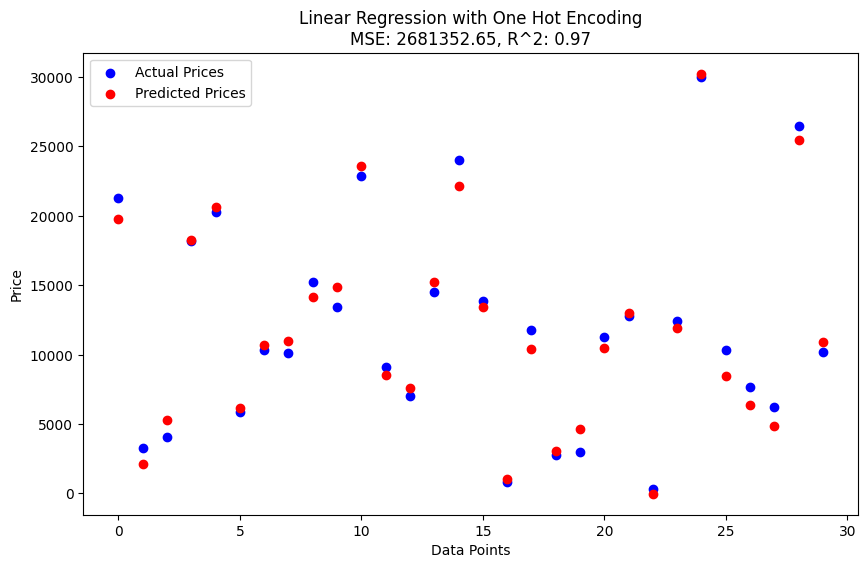

In [255]:
# view 30 sample predictions
sample_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sample_predictions = sample_predictions.sample(30, random_state=42)
#print(sample_predictions)

# Calculate the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(sample_predictions)), sample_predictions['Actual'], color='blue', label='Actual Prices') 
plt.scatter(range(len(sample_predictions)), sample_predictions['Predicted'], color='red', label='Predicted Prices') 
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.title(f'Linear Regression with One Hot Encoding\nMSE: {mse:.2f}, R^2: {r2:.2f}')
plt.show()

r2 van 0.97 betekend dat er 97 procent minder variatie is rond de regressielijn dan het gemiddelde. Dit betekend dat de meeste variatie in de data is explained door de relatie tussen de features en de uiteindelijke target (sellingprice)

'de relatie tussen de input data en de output data explains 97% van de data"

bron: https://www.youtube.com/watch?v=2AQKmw14mHM

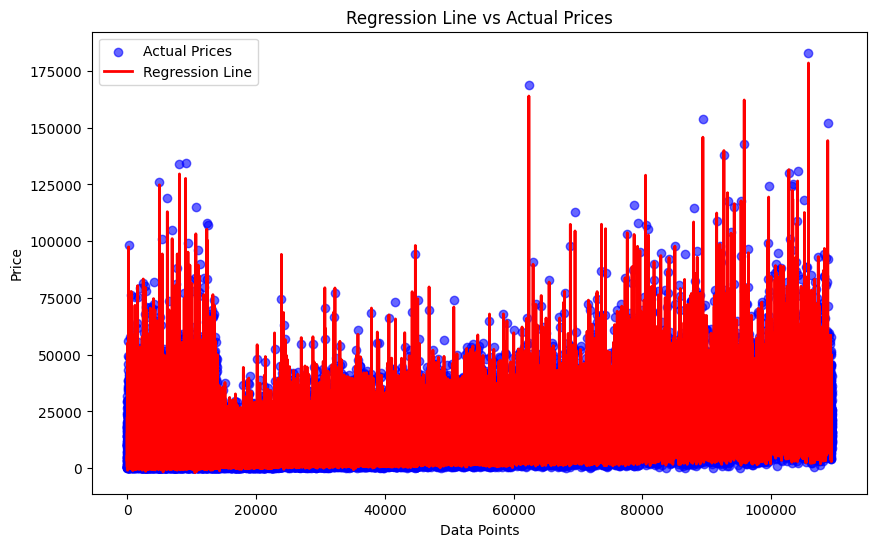

In [ ]:
# Sort the test data and predictions for a smooth regression line
sorted_indices = X_test['condition'].argsort()
X_test_sorted = X_test.iloc[sorted_indices]
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Plot the actual values and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual Prices', alpha=0.6)
plt.plot(range(len(y_pred_sorted)), y_pred_sorted, color='red', label='Regression Line', linewidth=2)
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.title('Regression Line vs Actual Prices')
plt.show()

---

## EXTRA

### Model maken met pipeline

Gezien we een conntinue uitkomst (namelijk de sellingsprice) willen voorspellen, wordt lineaire regressie gekozen als model.

In [ ]:
# model maken
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Define features and target variable
X = filtered_data.drop(columns=["sellingprice"])
y = filtered_data["sellingprice"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the preprocessing steps for numerical and categorical features
numeric_features = ["year", "odometer", "mmr", "condition"]
categorical_features = ["make", "model", "trim", "body", "transmission"]
# Preprocessing for numerical features: impute missing values and scale
numeric_transformer = make_pipeline(
    StandardScaler()
)
# Preprocessing for categorical features: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
# Create a pipeline that first transforms the data and then fits the model
pipeline = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
# Fit the model
pipeline.fit(X_train, y_train)
# Make predictions on the test set
y_pred = pipeline.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
# Cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')


